# 라이브러리 및 csv 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as ml
import seaborn as sns
import folium as fm

import time
import datetime

In [3]:
df_all = pd.read_csv("11_df_final.csv")
df_same_city = pd.read_csv("11_df_same_city.csv")
df_same_state = pd.read_csv("12_df_same_state.csv")
df_diff_state = pd.read_csv("13_df_diff_states.csv")

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     96455 non-null  int64  
 1   order_id                       96455 non-null  object 
 2   customer_id                    96455 non-null  object 
 3   seller_id                      96455 non-null  object 
 4   order_purchase_timestamp       96455 non-null  object 
 5   order_approved_at              96455 non-null  object 
 6   order_delivered_carrier_date   96455 non-null  object 
 7   order_delivered_customer_date  96455 non-null  object 
 8   order_estimated_delivery_date  96455 non-null  object 
 9   shipping_limit_date            96455 non-null  object 
 10  seller_city                    96240 non-null  object 
 11  seller_state                   96240 non-null  object 
 12  customer_city                  96191 non-null 

## index 떨구기

In [5]:
df_all.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'seller_id',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date', 'seller_city',
       'seller_state', 'customer_city', 'customer_state', 'price',
       'freight_value', 'category', 'p_name_length', 'p_description_length',
       'p_photos_qty', 'p_weight_g', 'p_length_cm', 'p_height_cm',
       'p_width_cm', 'category_eng', 'review_score', 'rev_creation_date',
       'rev_answer_timestamp'],
      dtype='object')

In [6]:
df_all = df_all.drop(columns=['Unnamed: 0'])
df_same_city = df_same_city.drop(columns=['Unnamed: 0'])
df_same_state = df_same_state.drop(columns=['Unnamed: 0'])
df_diff_state = df_diff_state.drop(columns=['Unnamed: 0'])

In [7]:
df_all.head()

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07,maua,...,268.0,4.0,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 3:24,belo horizonte,...,178.0,1.0,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 8:55,guariba,...,232.0,1.0,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-23 19:45,belo horizonte,...,468.0,3.0,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-19 20:31,mogi das cruzes,...,316.0,4.0,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51


## df_all 에 시간차 데이터 넣기

In [ ]:
# today.day, today.hour

### df_all 시간 데이터로 바꿔주기

In [8]:
df_all['order_purchase_timestamp']=pd.to_datetime(df_all['order_purchase_timestamp'])
df_all['order_approved_at']=pd.to_datetime(df_all['order_approved_at'])
df_all['order_delivered_carrier_date']=pd.to_datetime(df_all['order_delivered_carrier_date'])
df_all['order_delivered_customer_date']=pd.to_datetime(df_all['order_delivered_customer_date'])
df_all['order_estimated_delivery_date']=pd.to_datetime(df_all['order_estimated_delivery_date'])
df_all['shipping_limit_date']=pd.to_datetime(df_all['shipping_limit_date'])

In [9]:
df_all.head()

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,268.0,4.0,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,178.0,1.0,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,232.0,1.0,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,468.0,3.0,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,316.0,4.0,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51


### (실패)시간 일로 바꾸기

In [30]:
# today = datetime.datetime.today()
# today.year, today.month, today.day, today.hour, today.minute, today.second, today.microsecond

(2021, 12, 29, 4, 51, 16, 323147)

In [28]:
# d = datetime.datetime.strptime('2018-05-19', '%Y-%m-%d')
# d

datetime.datetime(2018, 5, 19, 0, 0)

In [ ]:
# >>> today = date.today()
# >>> today.year
# 2020
# >>> today.month
# 7
# >>> today.day
# 18

In [ ]:
# from datetime import datetime

# now = datetime.now()
# print(now)

# past = datetime.strptime("20210305", "%Y%m%d")
# print(past)

# diff =  now - past
# print(diff)

# # days를 통해 일 수(days) 차이 정보를 가져올 수 있다. 
# print("Day difference : ", diff.days)

# # seconds 통해 시간 차이 정보를 초 단위로 가져올 수 있다. 
# print("Second difference : ", diff.seconds)

# # seconds 통해 시간 차이 정보를 마이크로초 단위로 가져올 수 있다. 
# print("MicroSecond difference : ", diff.microseconds)

그냥 날짜 타입 자체로 계산한 거를 바로 반올림한 날(숫자)로 변환하고 싶었는데 도저히 안되겠다 ....

In [32]:
# df_all["example"] = df_all['order_delivered_customer_date']-df_all['order_purchase_timestamp']
# df_all

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time,example
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,2 days 20:58:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,e24fc9fcd865784fb25705606fe3dfe7,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-15 09:54:00,braganca paulista,...,1175.0,22.0,13.0,18.0,food-processing or food-preparing appliance,5.0,2017-03-22 00:00:00,2017-03-23 11:02:08,8 days 05:13:56,8 days 05:13:56
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,1f9ab4708f3056ede07124aad39a2554,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02-12 13:10:00,tupa,...,4950.0,40.0,10.0,40.0,food-processing or food-preparing appliance,4.0,2018-03-01 00:00:00,2018-03-02 17:50:01,22 days 04:38:58,22 days 04:38:58
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,d50d79cb34e38265a8649c383dcffd48,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09-05 15:04:00,sao paulo,...,13300.0,32.0,90.0,22.0,food-processing or food-preparing appliance,5.0,2017-09-22 00:00:00,2017-09-22 23:10:57,24 days 20:37:34,24 days 20:37:34
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,a1043bafd471dff536d0c462352beb48,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-12 21:36:00,ilicinea,...,6550.0,20.0,20.0,20.0,food-processing or food-preparing appliance,2.0,2018-01-26 00:00:00,2018-01-27 09:16:56,17 days 02:04:27,17 days 02:04:27


In [49]:
# df_all = df_all.drop(columns=["example"])
# df_all.shape

(96455, 28)

### df_all 시간차 데이터 넣기

In [10]:
# 실 소요 시간 = 배달완료-구매완료시간 : del_lead_time_indiffstates

df_all["del_lead_time"] = df_all['order_delivered_customer_date']-df_all['order_purchase_timestamp']
df_all.head()

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,4.0,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,1.0,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,1.0,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,3.0,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,4.0,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23


In [11]:
df_all["del_lead_time"]

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
96450    8 days 05:13:56
96451   22 days 04:38:58
96452   24 days 20:37:34
96453   17 days 02:04:27
96454    7 days 16:11:00
Name: del_lead_time, Length: 96455, dtype: timedelta64[ns]

In [12]:
# 예상 소요 시간 = 예상배달완료-구매완료시간 : esti_lead_time_indiffstates

df_all["esti_lead_time"] = df_all['order_estimated_delivery_date']-df_all['order_purchase_timestamp']
df_all.head()

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_weight_g,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time,esti_lead_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,500.0,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,15 days 13:03:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,400.0,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,19 days 03:18:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,420.0,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,26 days 15:21:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,450.0,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,26 days 04:31:54
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,250.0,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,12 days 02:41:21


In [13]:
# 실제 지연 시간 = 예상배달완료시간-배달완료시간 : gap_esti_real_indiffstates

df_all["gap_esti_real"] = df_all['order_estimated_delivery_date']-df_all['order_delivered_customer_date']
df_all.head()

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_length_cm,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time,esti_lead_time,gap_esti_real
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,19.0,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,19.0,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,24.0,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,30.0,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,51.0,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58


In [14]:
# 남은 지연 시간 = 배송리밋시간-배달완료시간 : gap_limit_real_indiffstates

df_all["gap_limit_real"] = df_all['shipping_limit_date']-df_all['order_delivered_customer_date']
df_all.head()

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_height_cm,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time,esti_lead_time,gap_esti_real,gap_limit_real
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,8.0,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,-5 days +13:41:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,13.0,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,-9 days +11:56:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,19.0,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,-5 days +14:48:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,10.0,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,-9 days +19:16:18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,15.0,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,3 days 02:13:58


In [15]:
# 추가 리밋 시간 = 배송리밋시간-예상배달완료 시간 : gap_limit_esti_indiffstates

df_all["gap_limit_esti"] = df_all['shipping_limit_date']-df_all['order_estimated_delivery_date']
df_all.head()

,order_id,customer_id,seller_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,seller_city,...,p_width_cm,category_eng,review_score,rev_creation_date,rev_answer_timestamp,del_lead_time,esti_lead_time,gap_esti_real,gap_limit_real,gap_limit_esti
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:00,maua,...,13.0,food-processing or food-preparing appliance,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,8 days 10:28:40,15 days 13:03:27,7 days 02:34:47,-5 days +13:41:47,-12 days +11:07:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,289cdb325fb7e7f891c38608bf9e0962,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:00,belo horizonte,...,19.0,food-processing or food-preparing appliance,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,13 days 18:46:08,19 days 03:18:23,5 days 08:32:15,-9 days +11:56:15,-14 days +03:24:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:00,guariba,...,21.0,food-processing or food-preparing appliance,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,9 days 09:27:40,26 days 15:21:11,17 days 05:53:31,-5 days +14:48:31,-22 days +08:55:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,66922902710d126a0e7d26b0e3805106,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:00,belo horizonte,...,20.0,food-processing or food-preparing appliance,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58,13 days 05:00:36,26 days 04:31:54,12 days 23:31:18,-9 days +19:16:18,-22 days +19:45:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2c9e548be18521d1c43cde1c582c6de8,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:00,mogi das cruzes,...,15.0,food-processing or food-preparing appliance,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51,2 days 20:58:23,12 days 02:41:21,9 days 05:42:58,3 days 02:13:58,-7 days +20:31:00


## 리뷰 남긴 날과의 차이

In [16]:
df_all['rev_creation_date']=pd.to_datetime(df_all['rev_creation_date'])

In [17]:
df_all["review-del"] = df_all['rev_creation_date'] - df_all['order_delivered_customer_date']

# 연습) 히트맵을 위해 수치데이터만 남겨보기

<AxesSubplot:>

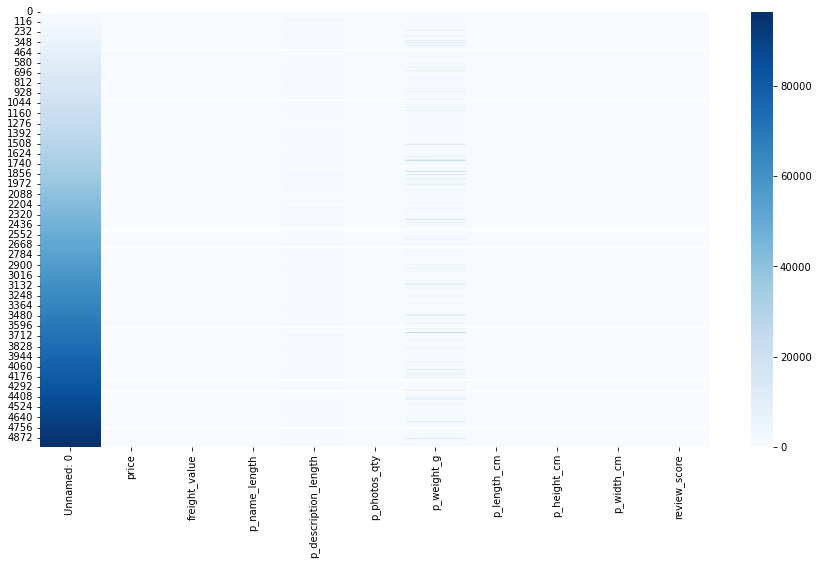

In [29]:
df_1 = df_same_city.select_dtypes(exclude="object")
plt.figure(figsize = (15,8))
sns.heatmap(data=df_1, cmap = "Blues")

In [30]:
# 데이터프레임 전체의 수치변수에 대해 상관계수를 구합니다. 
# 피어슨 상관계수가 기본으로 지원되는 것으로 나온다.

corr= df_1.corr()
corr

,Unnamed: 0,price,freight_value,p_name_length,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,review_score
Unnamed: 0,1.000000,-0.006337,-0.001427,0.001252,-0.007125,-0.007408,-0.005012,-0.008130,0.012848,-0.010844,0.004257
price,-0.006337,1.000000,0.526641,0.026850,0.158797,0.000845,0.439448,0.258321,0.321441,0.272869,-0.000474
freight_value,-0.001427,0.526641,1.000000,0.030657,0.058277,-0.007032,0.744334,0.493887,0.517998,0.473929,-0.018860
p_name_length,0.001252,0.026850,0.030657,1.000000,0.021851,0.206198,0.058115,0.026474,-0.041749,0.019277,-0.052492
p_description_length,-0.007125,0.158797,0.058277,0.021851,1.000000,0.025879,0.038126,0.065475,0.045607,0.003004,0.004958
p_photos_qty,-0.007408,0.000845,-0.007032,0.206198,0.025879,1.000000,-0.000545,0.016275,-0.129552,0.011361,-0.019909
p_weight_g,-0.005012,0.439448,0.744334,0.058115,0.038126,-0.000545,1.000000,0.493308,0.555508,0.516100,-0.038949
p_length_cm,-0.008130,0.258321,0.493887,0.026474,0.065475,0.016275,0.493308,1.000000,0.280584,0.570620,-0.021904
p_height_cm,0.012848,0.321441,0.517998,-0.041749,0.045607,-0.129552,0.555508,0.280584,1.000000,0.358913,-0.020169
p_width_cm,-0.010844,0.272869,0.473929,0.019277,0.003004,0.011361,0.516100,0.570620,0.358913,1.000000,-0.025649


In [31]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

In [32]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 생성

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
# mask 

mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

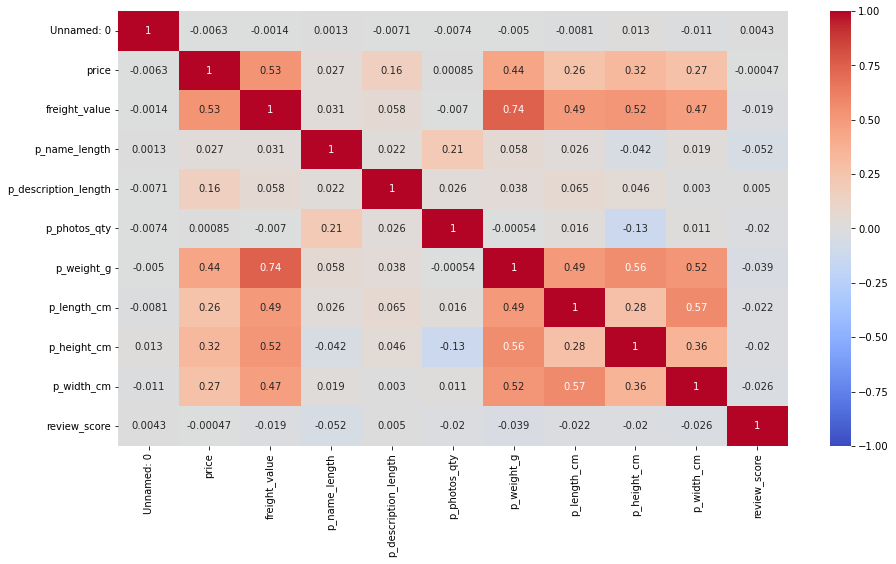

In [33]:
# heatmap 을 통해 상관계수를 시각화 합니다.
plt.figure(figsize = (15,8))
sns.heatmap(data=corr, annot=True, cmap="coolwarm", vmin = -1, vmax=1)
# annot=True 색상값 그리기
# 대각선은 자기 자신이라서 1이다.
# 대각선 기준으로 마주본다.

<AxesSubplot:>

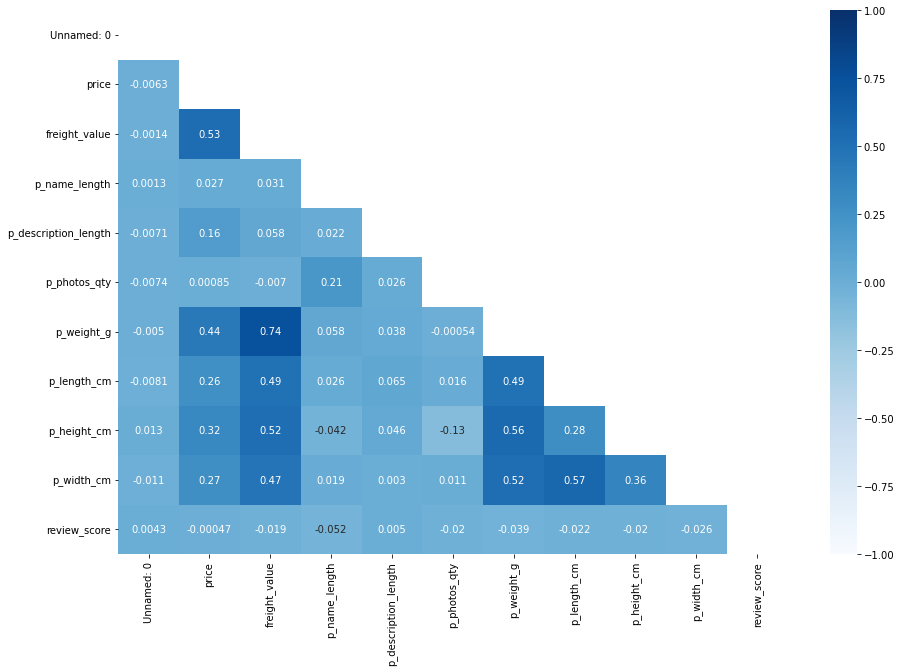

In [34]:
# 위 한다음 새로 했을 때 대각선을 지울 때의 히트맵을 보여준다.
plt.figure(figsize = (15,10))
sns.heatmap(data=corr, annot=True, cmap="Blues", vmin = -1, vmax=1, mask=mask)

# df_all 가지고 상관관계 히트맵 해보기

In [77]:
# df_all = df_all.drop(columns=['1del_lead_time'])

In [18]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       96455 non-null  object         
 1   customer_id                    96455 non-null  object         
 2   seller_id                      96455 non-null  object         
 3   order_purchase_timestamp       96455 non-null  datetime64[ns] 
 4   order_approved_at              96455 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96455 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns] 
 8   shipping_limit_date            96455 non-null  datetime64[ns] 
 9   seller_city                    96240 non-null  object         
 10  seller_state                   96240 non-null  object         
 11  cu

In [19]:
# timedelta_series.dt.days

df_all["d_del_lead_time"] = df_all["del_lead_time"].dt.days
df_all["d_del_lead_time"]

0         8
1        13
2         9
3        13
4         2
         ..
96450     8
96451    22
96452    24
96453    17
96454     7
Name: d_del_lead_time, Length: 96455, dtype: int64

In [20]:
df_all["d_esti_lead_time"] = df_all["esti_lead_time"].dt.days
df_all["d_gap_esti_real"] = df_all["gap_esti_real"].dt.days
df_all["d_gap_limit_real"] = df_all["gap_limit_real"].dt.days
df_all["d_gap_limit_esti"] = df_all["gap_limit_esti"].dt.days
df_all["d_review-del"] = df_all["review-del"].dt.days

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       96455 non-null  object         
 1   customer_id                    96455 non-null  object         
 2   seller_id                      96455 non-null  object         
 3   order_purchase_timestamp       96455 non-null  datetime64[ns] 
 4   order_approved_at              96455 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96455 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns] 
 8   shipping_limit_date            96455 non-null  datetime64[ns] 
 9   seller_city                    96240 non-null  object         
 10  seller_state                   96240 non-null  object         
 11  cu

In [22]:
df_2 = df_all.select_dtypes(exclude="object")
plt.figure(figsize = (15,8))
sns.heatmap(data=df_2, cmap = "Blues")

TypeError: float() argument must be a string or a number, not 'Timestamp'

<Figure size 1080x576 with 0 Axes>

In [52]:
# 데이터프레임 전체의 수치변수에 대해 상관계수를 구합니다. 
# 피어슨 상관계수가 기본으로 지원되는 것으로 나온다.

corr= df_2.corr()
corr

,Unnamed: 0,price,freight_value,p_name_length,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,review_score,d_del_lead_time,d_esti_lead_time,d_gap_esti_real,d_gap_limit_real,d_gap_limit_esti,d_review-del
Unnamed: 0,1.000000,-0.003637,0.001423,0.004635,0.000243,-0.001775,-0.002987,-0.006265,0.003158,-0.004291,-0.001935,0.003962,0.007158,0.002175,-0.001233,-0.004292,-0.004218
price,-0.003637,1.000000,0.419530,0.016509,0.202179,0.050093,0.346806,0.146088,0.233348,0.174910,-0.005638,0.059697,0.074170,0.008072,-0.039228,-0.055885,-0.017122
freight_value,0.001423,0.419530,1.000000,0.026462,0.097347,0.022678,0.617019,0.312868,0.391051,0.328158,-0.036273,0.214150,0.283235,0.045274,-0.176409,-0.257956,-0.035713
p_name_length,0.004635,0.016509,0.026462,1.000000,0.093993,0.146697,0.030168,0.060681,-0.015705,0.063737,-0.016214,-0.002042,-0.016521,-0.012030,-0.014329,-0.002025,0.001235
p_description_length,0.000243,0.202179,0.097347,0.093993,1.000000,0.121670,0.057779,-0.000218,0.072849,-0.063217,0.013516,0.003701,0.001231,-0.002054,-0.006507,-0.004819,0.000835
p_photos_qty,-0.001775,0.050093,0.022678,0.146697,0.121670,1.000000,0.028336,0.048299,-0.025491,0.009730,0.013300,-0.027308,-0.033549,-0.003727,0.002999,0.007754,0.007293
p_weight_g,-0.002987,0.346806,0.617019,0.030168,0.057779,0.028336,1.000000,0.463759,0.583293,0.511239,-0.029782,0.080906,0.075139,-0.010921,-0.035510,-0.028978,-0.018904
p_length_cm,-0.006265,0.146088,0.312868,0.060681,-0.000218,0.048299,0.463759,1.000000,0.193169,0.546594,-0.020421,0.065280,0.059506,-0.009834,-0.036097,-0.030911,-0.011774
p_height_cm,0.003158,0.233348,0.391051,-0.015705,0.072849,-0.025491,0.583293,0.193169,1.000000,0.287558,-0.019325,0.060709,0.067830,0.001862,-0.024005,-0.030413,-0.015975
p_width_cm,-0.004291,0.174910,0.328158,0.063737,-0.063217,0.009730,0.511239,0.546594,0.287558,1.000000,-0.013922,0.041678,0.045051,-0.000590,-0.021379,-0.025020,-0.010685


In [39]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

In [56]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 생성

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
# mask 

mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

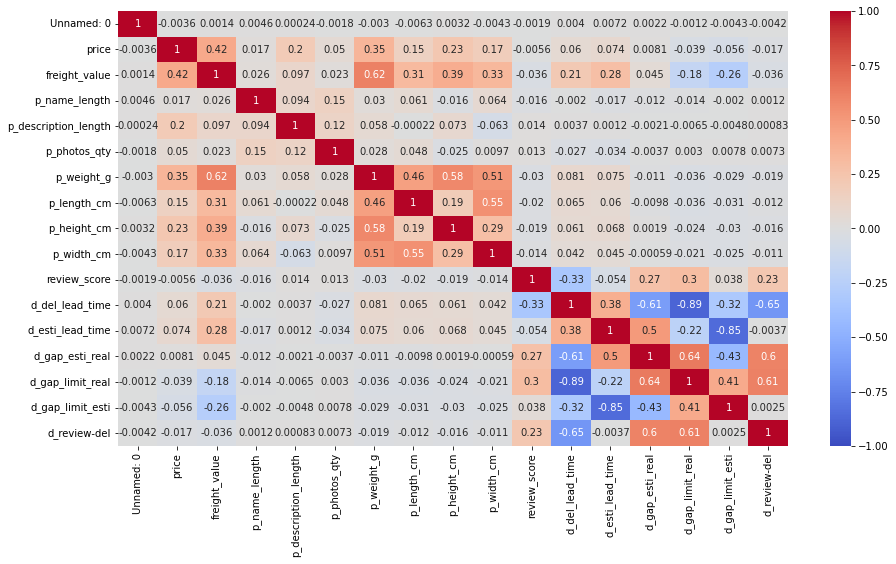

In [53]:
# heatmap 을 통해 상관계수를 시각화 합니다.
plt.figure(figsize = (15,8))
sns.heatmap(data=corr, annot=True, cmap="coolwarm", vmin = -1, vmax=1)
# annot=True 색상값 그리기
# 대각선은 자기 자신이라서 1이다.
# 대각선 기준으로 마주본다.

<AxesSubplot:>

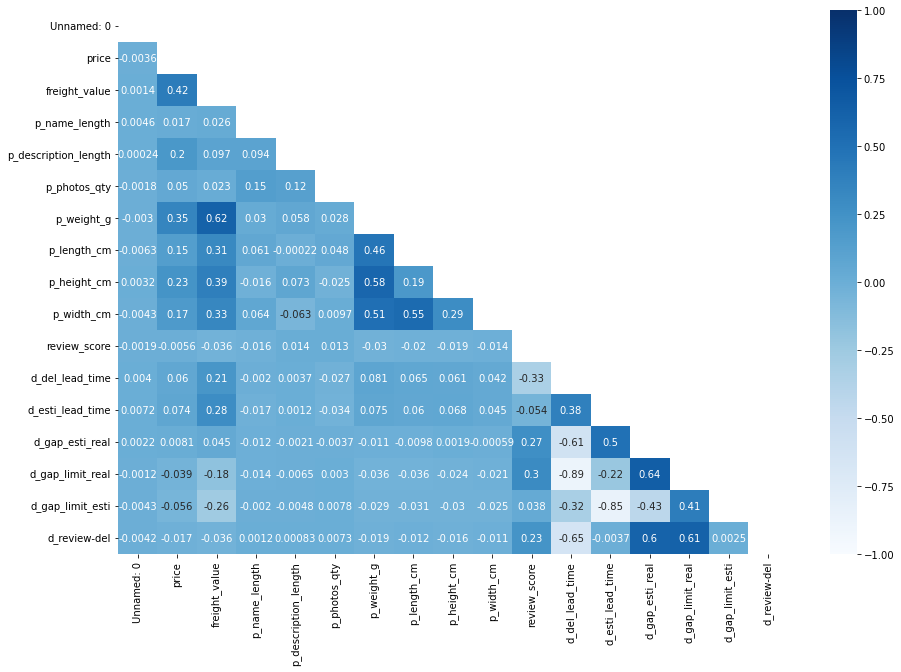

In [57]:
# 위 한다음 새로 했을 때 대각선을 지울 때의 히트맵을 보여준다.
plt.figure(figsize = (15,10))
sns.heatmap(data=corr, annot=True, cmap="Blues", vmin = -1, vmax=1, mask=mask)

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계, 

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계, 

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계, 

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계, 

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계, 

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계, 

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계!!

In [66]:
df_all = df_all.drop(columns = 'Unnamed: 0')

In [67]:
df_all.to_csv("14_final_merged.csv", index=False)

In [69]:
# 파일확인차 쓴것

# f = pd.read_csv("14_final_merged.csv")

In [70]:
# f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96455 non-null  object 
 1   customer_id                    96455 non-null  object 
 2   seller_id                      96455 non-null  object 
 3   order_purchase_timestamp       96455 non-null  object 
 4   order_approved_at              96455 non-null  object 
 5   order_delivered_carrier_date   96455 non-null  object 
 6   order_delivered_customer_date  96455 non-null  object 
 7   order_estimated_delivery_date  96455 non-null  object 
 8   shipping_limit_date            96455 non-null  object 
 9   seller_city                    96240 non-null  object 
 10  seller_state                   96240 non-null  object 
 11  customer_city                  96191 non-null  object 
 12  customer_state                 96191 non-null 

# 거리별로 나누어 상관관계 구하기

In [109]:
df_same_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       4978 non-null   object 
 1   customer_id                    4978 non-null   object 
 2   seller_id                      4978 non-null   object 
 3   order_purchase_timestamp       4978 non-null   object 
 4   order_approved_at              4978 non-null   object 
 5   order_delivered_carrier_date   4978 non-null   object 
 6   order_delivered_customer_date  4978 non-null   object 
 7   order_estimated_delivery_date  4978 non-null   object 
 8   shipping_limit_date            4978 non-null   object 
 9   seller_city                    4978 non-null   object 
 10  seller_state                   4978 non-null   object 
 11  customer_city                  4978 non-null   object 
 12  customer_state                 4978 non-null   o

## 조건별로 나누기

In [110]:
# df_same_city['rev_creation_date']=pd.to_datetime(df_same_city['rev_creation_date'])

In [112]:
# df_same_city['del_lead_time_insamecity']=pd.to_datetime(df_same_city['del_lead_time_insamecity'])
# df_same_city['esti_lead_time_insamecity']=pd.to_datetime(df_same_city['esti_lead_time_insamecity'])
# df_same_city['gap_esti_real_insamecity']=pd.to_datetime(df_same_city['gap_esti_real_insamecity'])
# df_same_city['gap_limit_real_insamecity']=pd.to_datetime(df_same_city['gap_limit_real_insamecity'])
# df_same_city['gap_limit_esti_insamecity']=pd.to_datetime(df_same_city['gap_limit_esti_insamecity'])

ParserError: Unknown string format: 21 days 07:52:16

In [111]:
# df_same_city["review-del"] = df_same_city['rev_creation_date'] - df_same_city['order_delivered_customer_date']

/Users/Angela/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

다시 시간 형식으로 바꾸어주어야 하고 이미 계산된 것도 확인하지 못한다. 그냥 df_all에서 조건을 건다.

In [71]:
same_city = df_all[(df_all['customer_city'] == df_all['seller_city'])&(df_all['customer_state'] == df_all['seller_state'])]

same_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 19 to 96396
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       4978 non-null   object         
 1   customer_id                    4978 non-null   object         
 2   seller_id                      4978 non-null   object         
 3   order_purchase_timestamp       4978 non-null   datetime64[ns] 
 4   order_approved_at              4978 non-null   datetime64[ns] 
 5   order_delivered_carrier_date   4978 non-null   datetime64[ns] 
 6   order_delivered_customer_date  4978 non-null   datetime64[ns] 
 7   order_estimated_delivery_date  4978 non-null   datetime64[ns] 
 8   shipping_limit_date            4978 non-null   datetime64[ns] 
 9   seller_city                    4978 non-null   object         
 10  seller_state                   4978 non-null   object         
 11  cu

In [114]:
same_state = df_all[(df_all['customer_city'] != df_all['seller_city'])&(df_all['customer_state'] == df_all['seller_state'])]

same_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29545 entries, 0 to 96451
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       29545 non-null  object         
 1   customer_id                    29545 non-null  object         
 2   seller_id                      29545 non-null  object         
 3   order_purchase_timestamp       29545 non-null  datetime64[ns] 
 4   order_approved_at              29545 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   29545 non-null  datetime64[ns] 
 6   order_delivered_customer_date  29545 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  29545 non-null  datetime64[ns] 
 8   shipping_limit_date            29545 non-null  datetime64[ns] 
 9   seller_city                    29545 non-null  object         
 10  seller_state                   29545 non-null  object         
 11  cu

In [115]:
diff_states = df_all[(df_all['customer_state'] != df_all['seller_state'])]

diff_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61932 entries, 1 to 96454
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       61932 non-null  object         
 1   customer_id                    61932 non-null  object         
 2   seller_id                      61932 non-null  object         
 3   order_purchase_timestamp       61932 non-null  datetime64[ns] 
 4   order_approved_at              61932 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   61932 non-null  datetime64[ns] 
 6   order_delivered_customer_date  61932 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  61932 non-null  datetime64[ns] 
 8   shipping_limit_date            61932 non-null  datetime64[ns] 
 9   seller_city                    61717 non-null  object         
 10  seller_state                   61717 non-null  object         
 11  cu

In [116]:
diff_states.isna().sum()

order_id                            0
customer_id                         0
seller_id                           0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
shipping_limit_date                 0
seller_city                       215
seller_state                      215
customer_city                     264
customer_state                    264
price                            1743
freight_value                    1743
category                         1743
p_name_length                    1743
p_description_length             1743
p_photos_qty                     1743
p_weight_g                       1743
p_length_cm                      1743
p_height_cm                      1743
p_width_cm                       1743
category_eng                     1743
review_score                     1743
rev_creation_date                1743
rev_answer_t

# 조건별로 나눈 것 상관관계 구해보기

## 같은 도시

In [117]:
# 데이터프레임 전체의 수치변수에 대해 상관계수를 구합니다. 
# 피어슨 상관계수가 기본으로 지원되는 것으로 나온다.

corr= same_city.corr()
corr

,price,freight_value,p_name_length,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,review_score,d_del_lead_time,d_esti_lead_time,d_gap_esti_real,d_gap_limit_real,d_gap_limit_esti,d_review-del
price,1.000000,0.526641,0.026850,0.158797,0.000845,0.439448,0.258321,0.321441,0.272869,-0.000474,0.069599,0.024129,-0.027028,-0.018336,0.015565,-0.037523
freight_value,0.526641,1.000000,0.030657,0.058277,-0.007032,0.744334,0.493887,0.517998,0.473929,-0.018860,0.082091,0.058138,-0.003436,-0.029278,-0.020948,-0.000350
p_name_length,0.026850,0.030657,1.000000,0.021851,0.206198,0.058115,0.026474,-0.041749,0.019277,-0.052492,0.023469,0.016057,0.000861,-0.036856,-0.028863,-0.023587
p_description_length,0.158797,0.058277,0.021851,1.000000,0.025879,0.038126,0.065475,0.045607,0.003004,0.004958,0.053597,0.058264,0.017713,-0.055370,-0.065307,-0.006392
p_photos_qty,0.000845,-0.007032,0.206198,0.025879,1.000000,-0.000545,0.016275,-0.129552,0.011361,-0.019909,-0.010926,-0.010684,-0.002794,-0.020802,-0.013473,-0.003431
p_weight_g,0.439448,0.744334,0.058115,0.038126,-0.000545,1.000000,0.493308,0.555508,0.516100,-0.038949,0.080484,0.045008,-0.014357,-0.023178,-0.002351,-0.010070
p_length_cm,0.258321,0.493887,0.026474,0.065475,0.016275,0.493308,1.000000,0.280584,0.570620,-0.021904,0.068957,0.073652,0.019591,-0.013545,-0.035366,0.012559
p_height_cm,0.321441,0.517998,-0.041749,0.045607,-0.129552,0.555508,0.280584,1.000000,0.358913,-0.020169,0.080834,0.038759,-0.020464,-0.036718,-0.006319,-0.000769
p_width_cm,0.272869,0.473929,0.019277,0.003004,0.011361,0.516100,0.570620,0.358913,1.000000,-0.025649,0.054105,0.040397,-0.000576,-0.007550,-0.006126,0.014033
review_score,-0.000474,-0.018860,-0.052492,0.004958,-0.019909,-0.038949,-0.021904,-0.020169,-0.025649,1.000000,-0.262595,-0.025261,0.161346,0.237100,0.003860,0.148507


In [118]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 생성

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
# mask 

mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

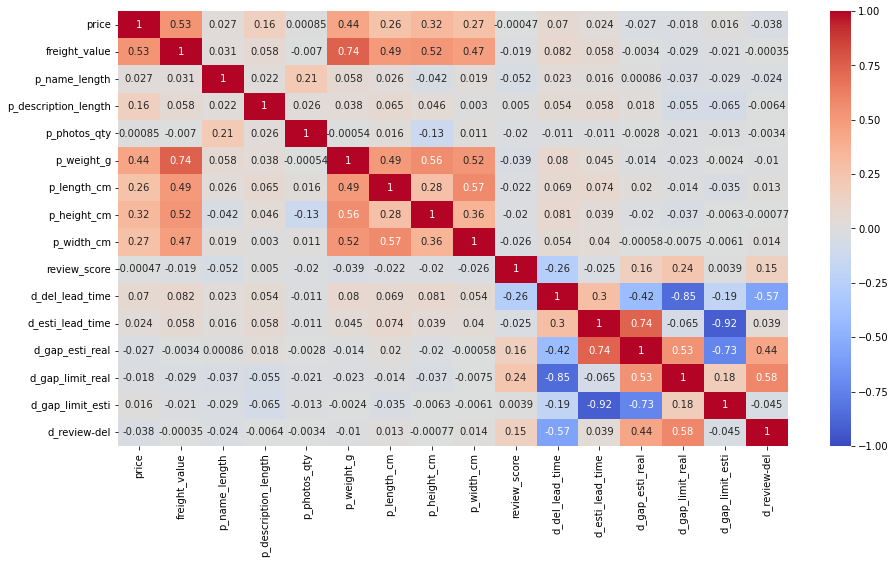

In [119]:
# heatmap 을 통해 상관계수를 시각화 합니다.
plt.figure(figsize = (15,8))
sns.heatmap(data=corr, annot=True, cmap="coolwarm", vmin = -1, vmax=1)
# annot=True 색상값 그리기
# 대각선은 자기 자신이라서 1이다.
# 대각선 기준으로 마주본다.

<AxesSubplot:>

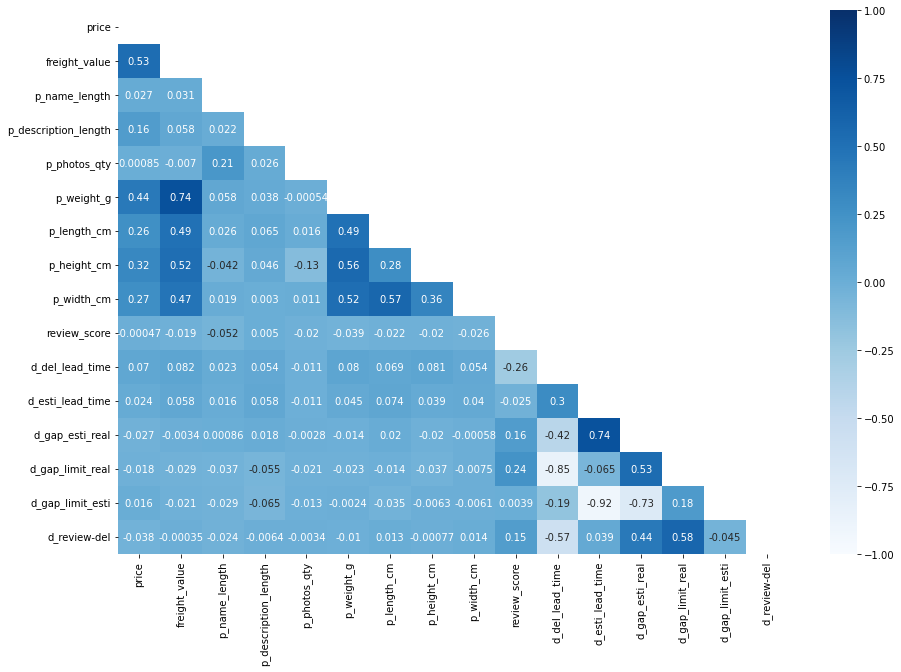

In [120]:
# 위 한다음 새로 했을 때 대각선을 지울 때의 히트맵을 보여준다.
plt.figure(figsize = (15,10))
sns.heatmap(data=corr, annot=True, cmap="Blues", vmin = -1, vmax=1, mask=mask)

## 같은 주 다른 도시

In [121]:
# 데이터프레임 전체의 수치변수에 대해 상관계수를 구합니다. 
# 피어슨 상관계수가 기본으로 지원되는 것으로 나온다.

corr= same_state.corr()
corr

,price,freight_value,p_name_length,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,review_score,d_del_lead_time,d_esti_lead_time,d_gap_esti_real,d_gap_limit_real,d_gap_limit_esti,d_review-del
price,1.000000,0.434987,0.013193,0.166031,0.041997,0.350347,0.152480,0.221882,0.168875,0.001584,0.048628,0.045746,0.000316,-0.018723,-0.021033,-0.015056
freight_value,0.434987,1.000000,0.000993,0.060375,0.001375,0.760430,0.422199,0.498640,0.448984,-0.031390,0.155934,0.175848,0.027775,-0.104056,-0.145798,-0.024092
p_name_length,0.013193,0.000993,1.000000,0.079158,0.148361,0.009031,0.068130,-0.039775,0.056963,-0.018495,-0.025462,-0.039437,-0.013258,-0.007682,0.009780,0.011009
p_description_length,0.166031,0.060375,0.079158,1.000000,0.141568,0.053729,-0.028194,0.078491,-0.081997,0.010822,-0.027146,-0.058989,-0.029230,0.019947,0.059176,0.001532
p_photos_qty,0.041997,0.001375,0.148361,0.141568,1.000000,0.019999,0.034038,-0.015897,-0.022193,-0.001434,-0.043339,-0.059576,-0.017264,0.009265,0.032000,-0.001777
p_weight_g,0.350347,0.760430,0.009031,0.053729,0.019999,1.000000,0.474399,0.601162,0.507610,-0.035235,0.126891,0.110690,-0.006458,-0.056302,-0.051703,-0.022696
p_length_cm,0.152480,0.422199,0.068130,-0.028194,0.034038,0.474399,1.000000,0.202729,0.573299,-0.027565,0.108938,0.106786,0.004679,-0.057573,-0.067479,-0.013398
p_height_cm,0.221882,0.498640,-0.039775,0.078491,-0.015897,0.601162,0.202729,1.000000,0.276328,-0.016982,0.087021,0.085216,0.003592,-0.030956,-0.037726,-0.013881
p_width_cm,0.168875,0.448984,0.056963,-0.081997,-0.022193,0.507610,0.573299,0.276328,1.000000,-0.024383,0.095460,0.099340,0.008975,-0.062107,-0.077984,-0.023383
review_score,0.001584,-0.031390,-0.018495,0.010822,-0.001434,-0.035235,-0.027565,-0.016982,-0.024383,1.000000,-0.256773,-0.037730,0.178970,0.233433,0.014954,0.134326


In [122]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 생성

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
# mask 

mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

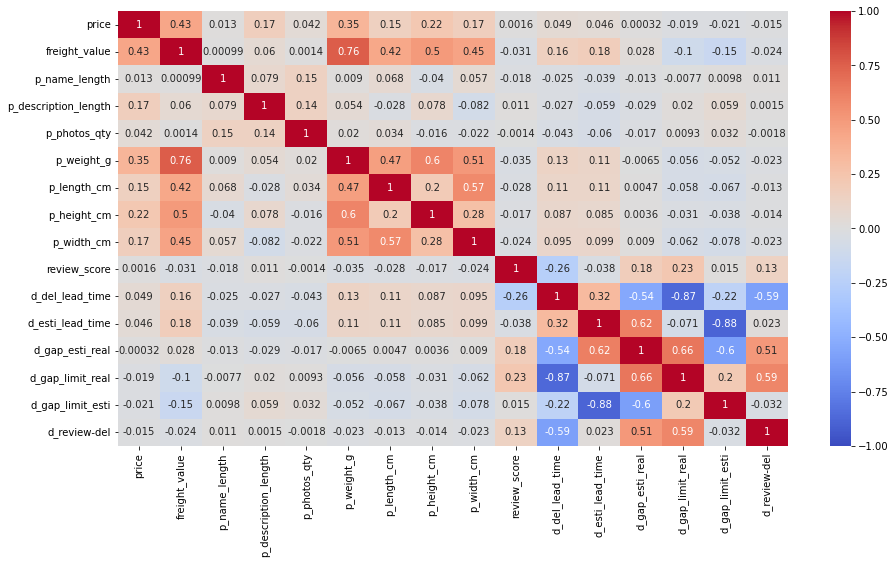

In [123]:
# heatmap 을 통해 상관계수를 시각화 합니다.
plt.figure(figsize = (15,8))
sns.heatmap(data=corr, annot=True, cmap="coolwarm", vmin = -1, vmax=1)
# annot=True 색상값 그리기
# 대각선은 자기 자신이라서 1이다.
# 대각선 기준으로 마주본다.

<AxesSubplot:>

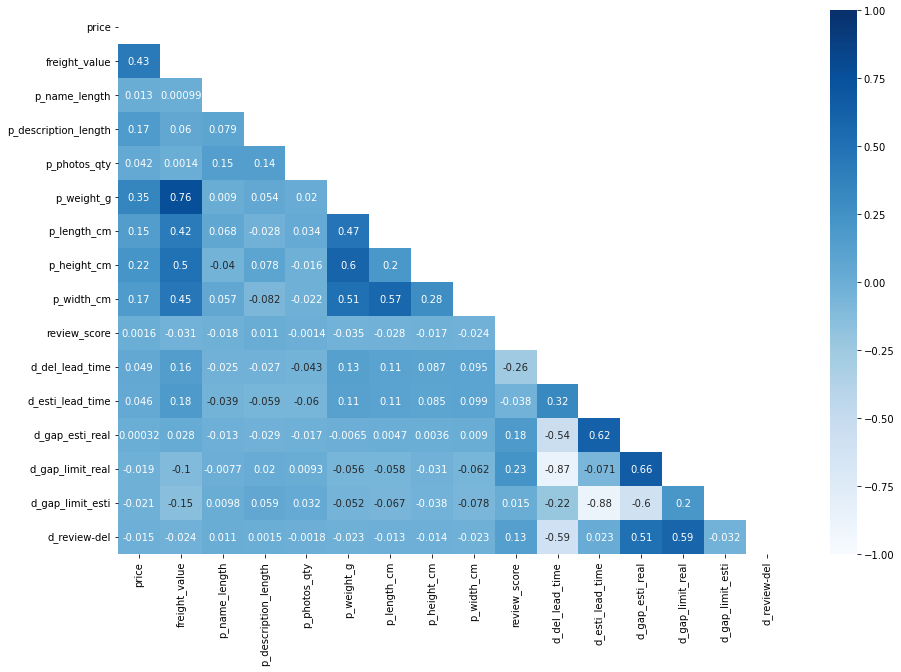

In [124]:
# 위 한다음 새로 했을 때 대각선을 지울 때의 히트맵을 보여준다.
plt.figure(figsize = (15,10))
sns.heatmap(data=corr, annot=True, cmap="Blues", vmin = -1, vmax=1, mask=mask)

## 다른 주

In [125]:
# 데이터프레임 전체의 수치변수에 대해 상관계수를 구합니다. 
# 피어슨 상관계수가 기본으로 지원되는 것으로 나온다.

corr= diff_states.corr()
corr

,price,freight_value,p_name_length,p_description_length,p_photos_qty,p_weight_g,p_length_cm,p_height_cm,p_width_cm,review_score,d_del_lead_time,d_esti_lead_time,d_gap_esti_real,d_gap_limit_real,d_gap_limit_esti,d_review-del
price,1.000000,0.424491,0.016804,0.217118,0.057662,0.345361,0.137452,0.234257,0.175006,-0.002248,0.033537,0.045189,0.000723,-0.017103,-0.025512,-0.012552
freight_value,0.424491,1.000000,0.035713,0.104305,0.029902,0.662840,0.317476,0.407023,0.345533,-0.014066,0.104084,0.141857,0.004637,-0.074769,-0.108915,-0.019726
p_name_length,0.016804,0.035713,1.000000,0.107471,0.143100,0.037035,0.058325,-0.003266,0.068648,-0.012545,0.003399,-0.014832,-0.013080,-0.017085,-0.004520,-0.000905
p_description_length,0.217118,0.104305,0.107471,1.000000,0.120648,0.061776,0.008054,0.071908,-0.057808,0.018566,-0.006669,-0.008550,0.000241,0.003488,0.004780,0.003418
p_photos_qty,0.057662,0.029902,0.143100,0.120648,1.000000,0.038094,0.060521,-0.019195,0.029307,0.022695,-0.028643,-0.036151,0.000436,0.004648,0.005564,0.011328
p_weight_g,0.345361,0.662840,0.037035,0.061776,0.038094,1.000000,0.455805,0.575033,0.511875,-0.026397,0.073791,0.075796,-0.014137,-0.031810,-0.024241,-0.018307
p_length_cm,0.137452,0.317476,0.058325,0.008054,0.060521,0.455805,1.000000,0.180905,0.530823,-0.016394,0.054688,0.044547,-0.018422,-0.030665,-0.016509,-0.011905
p_height_cm,0.234257,0.407023,-0.003266,0.071908,-0.019195,0.575033,0.180905,1.000000,0.287213,-0.018822,0.050424,0.064362,-0.000774,-0.016565,-0.021951,-0.016632
p_width_cm,0.175006,0.345533,0.068648,-0.057808,0.029307,0.511875,0.530823,0.287213,1.000000,-0.009483,0.035168,0.042685,-0.002672,-0.018156,-0.022122,-0.008710
review_score,-0.002248,-0.014066,-0.012545,0.018566,0.022695,-0.026397,-0.016394,-0.018822,-0.009483,1.000000,-0.365724,-0.016509,0.315008,0.325232,0.001011,0.256206


In [126]:
# np.triu : matrix를 상삼각행렬로 만드는 numpy math
# [1 2 3]   np.triu  [1 2 3]
# [4 5 6]   -------> [0 5 6]
# [2 3 4]            [0 0 4]
# np.ones_like(x) : x와 크기만 같은 1로 이루어진 array를 생성

# 수식적으로 어려워 보일수도 있지만 간단함
# 자기상관계수는 대각행렬을 기준으로 대칭되어 같은 값이 출력되므로,
# 이대로 전체를 heatmap을 plot하면 오히려 가독성이 떨어질 수 있음
# 이에, 가독성을 높이기 위해 대각행렬 기준으로 한쪽의 데이터들만 masking 기법을 통해 plot하여 
# 가독성을 높이는 효과를 가질수 있음
# np.ones_like로 heatmap의 마스크값 구하기
# mask 

mask = np.triu(np.ones_like(corr))

<AxesSubplot:>

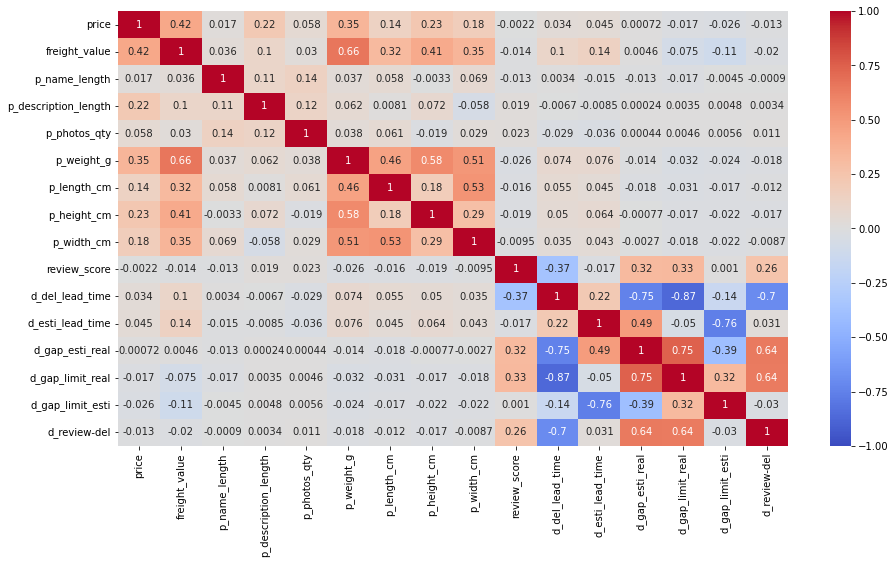

In [127]:
# heatmap 을 통해 상관계수를 시각화 합니다.
plt.figure(figsize = (15,8))
sns.heatmap(data=corr, annot=True, cmap="coolwarm", vmin = -1, vmax=1)
# annot=True 색상값 그리기
# 대각선은 자기 자신이라서 1이다.
# 대각선 기준으로 마주본다.

<AxesSubplot:>

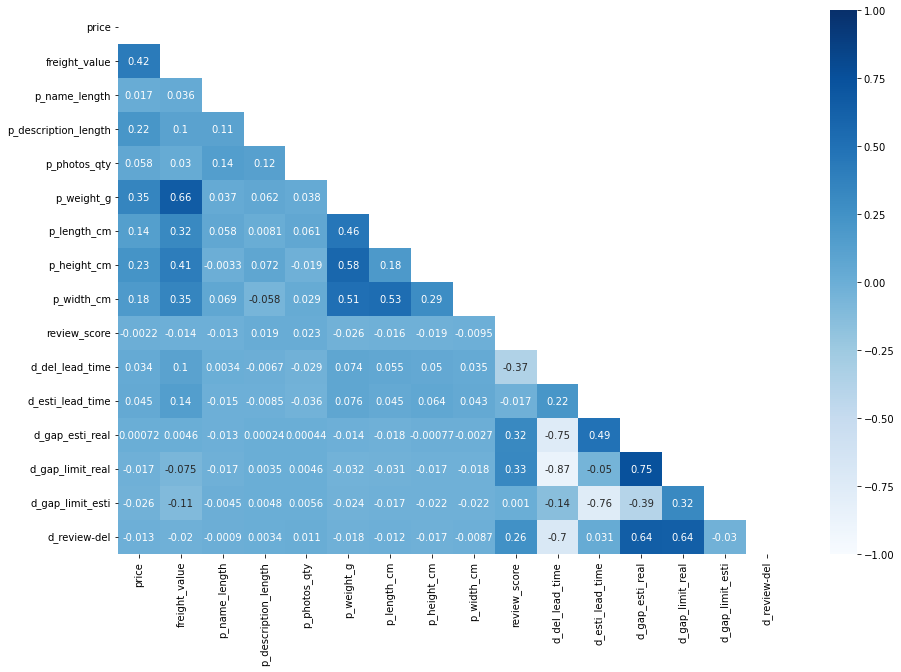

In [128]:
# 위 한다음 새로 했을 때 대각선을 지울 때의 히트맵을 보여준다.
plt.figure(figsize = (15,10))
sns.heatmap(data=corr, annot=True, cmap="Blues", vmin = -1, vmax=1, mask=mask)

# 시각화

In [133]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       96455 non-null  object         
 1   customer_id                    96455 non-null  object         
 2   seller_id                      96455 non-null  object         
 3   order_purchase_timestamp       96455 non-null  datetime64[ns] 
 4   order_approved_at              96455 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96455 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns] 
 8   shipping_limit_date            96455 non-null  datetime64[ns] 
 9   seller_city                    96240 non-null  object         
 10  seller_state                   96240 non-null  object         
 11  cu

## 실제배송소요시간 나타내기

<AxesSubplot:xlabel='category', ylabel='d_del_lead_time'>

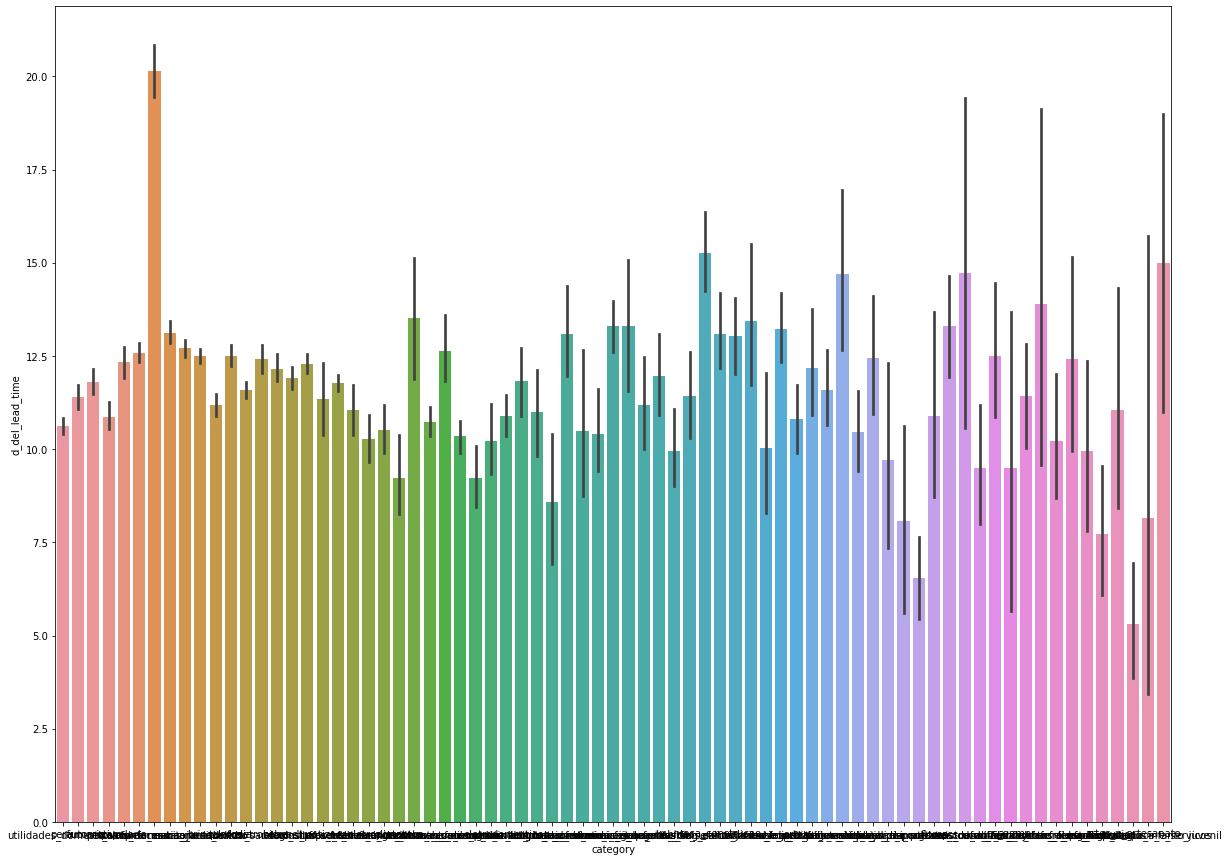

In [135]:
# 카테고리별 배송소요시간 

plt.figure(figsize = (20,15))
sns.barplot(data=df_all, x="category", y="d_del_lead_time")

<AxesSubplot:xlabel='seller_state', ylabel='d_del_lead_time'>

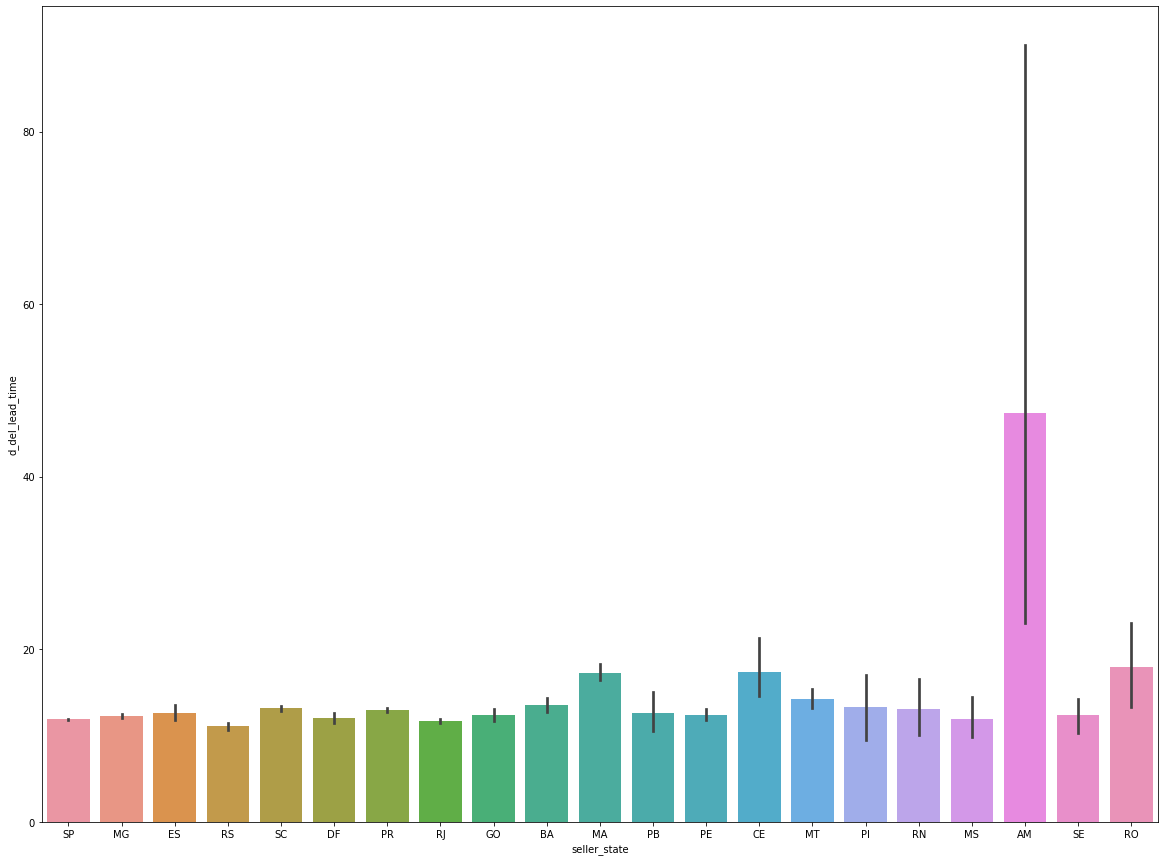

In [137]:
# 셀러 주 별 배송소요시간 

plt.figure(figsize = (20,15))
sns.barplot(data=df_all, x="seller_state", y="d_del_lead_time")

In [ ]:
# # 기간에 따른 배송소요시간 
# plt.figure(figsize = (20,15))
# sns.barplot(data=df_all, x = 'order_purchase_timestamp', y='d_del_lead_time')

In [ ]:
# sns.catplot(x="sex", y="total_bill",
#     ...                 hue="smoker", col="time",
#     ...                 data=tips, kind="bar",
#     ...                 height=4, aspect=.7)